In [1]:
import os
import numpy as np
import cv2
from sklearn.preprocessing import LabelBinarizer
from tqdm import tqdm

# Set directories
base_dir = "C:\\Users\\HP\\Downloads\\Dataset_Alzheimer_Wed"
class_dirs = {
    "Mild-Demented": os.path.join(base_dir, "Mild_Demented"),
    "Moderate-Demented": os.path.join(base_dir, "Moderate_Demented"),
    "Non-Demented": os.path.join(base_dir, "Non_Demented"),
    "VeryMild-Demented": os.path.join(base_dir, "Very_Mild_Demented")
}

# Define preprocessing parameters
target_size = (128, 128)  # Standardized for better model performance
batch_size = 16  # Matches typical model input batch size

# Initialize LabelBinarizer
lb = LabelBinarizer()
lb.fit(["Demented", "Non-Demented"])  # Fit only once globally

# Generator function to yield batches
def image_generator():
    images = []
    labels = []
    valid_extensions = (".jpg", ".png", ".jpeg")

    for class_name, class_dir in class_dirs.items():
        for img_file in tqdm(os.listdir(class_dir), desc=f'Processing {class_name}'):
            if not img_file.lower().endswith(valid_extensions):
                continue  # Skip non-image files
            
            img_path = os.path.join(class_dir, img_file)
            img = cv2.imread(img_path)

            # Resize using bicubic interpolation
            img_resized = cv2.resize(img, target_size, interpolation=cv2.INTER_CUBIC)

            # Apply bilateral filter for noise reduction while keeping edges
            img_denoised = cv2.bilateralFilter(img_resized, d=9, sigmaColor=75, sigmaSpace=75)

            # Apply CLAHE to each channel separately
            lab = cv2.cvtColor(img_denoised, cv2.COLOR_BGR2LAB)
            l, a, b = cv2.split(lab)
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            l = clahe.apply(l)
            lab = cv2.merge((l, a, b))
            img_clahe = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

            # Convert to float and normalize using standardization (zero mean, unit variance)
            img_normalized = img_clahe.astype(np.float32) / 255.0  # Scale to [0,1]
            mean = np.mean(img_normalized, axis=(0, 1), keepdims=True)
            std = np.std(img_normalized, axis=(0, 1), keepdims=True)
            img_standardized = (img_normalized - mean) / (std + 1e-7)  # Avoid division by zero

            # Assign labels
            label = "Demented" if class_name in ["Mild-Demented", "Moderate-Demented", "VeryMild-Demented"] else "Non-Demented"

            images.append(img_standardized)
            labels.append(label)

            # Yield batch
            if len(images) == batch_size:
                yield np.array(images), lb.transform(labels)
                images, labels = [], []  # Reset for next batch

    # Yield remaining images if any
    if images:
        yield np.array(images), lb.transform(labels)

# Example usage
for batch_images, batch_labels in image_generator():
    print(f"Batch images shape: {batch_images.shape}")
    print(f"Batch labels shape: {batch_labels.shape}")


Processing Mild-Demented:   4%|██▏                                                   | 37/896 [00:00<00:08, 101.29it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  10%|█████▎                                                | 88/896 [00:00<00:05, 140.21it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  14%|███████▏                                             | 122/896 [00:01<00:05, 150.64it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  18%|█████████▎                                           | 157/896 [00:01<00:04, 156.12it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  21%|███████████▏                                         | 190/896 [00:01<00:04, 155.89it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  25%|█████████████▎                                       | 225/896 [00:01<00:04, 146.74it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  28%|███████████████                                      | 255/896 [00:01<00:04, 131.97it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  32%|████████████████▋                                    | 283/896 [00:02<00:04, 125.91it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  36%|███████████████████▎                                 | 326/896 [00:02<00:04, 135.43it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  42%|██████████████████████                               | 373/896 [00:02<00:03, 134.29it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  45%|███████████████████████▉                             | 404/896 [00:03<00:03, 143.67it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  51%|██████████████████████████▉                          | 456/896 [00:03<00:02, 154.17it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  57%|██████████████████████████████▏                      | 511/896 [00:03<00:02, 164.49it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  61%|████████████████████████████████▎                    | 546/896 [00:03<00:02, 162.20it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  65%|██████████████████████████████████▏                  | 579/896 [00:04<00:02, 147.93it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  68%|███████████████████████████████████▉                 | 608/896 [00:04<00:02, 131.21it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  72%|██████████████████████████████████████▎              | 648/896 [00:04<00:01, 128.68it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  75%|███████████████████████████████████████▉             | 676/896 [00:04<00:01, 125.34it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  78%|█████████████████████████████████████████▌           | 703/896 [00:05<00:01, 104.82it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  83%|███████████████████████████████████████████▉         | 742/896 [00:05<00:01, 116.88it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  86%|█████████████████████████████████████████████▋       | 773/896 [00:05<00:00, 128.32it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  90%|███████████████████████████████████████████████▌     | 805/896 [00:06<00:00, 137.88it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented:  93%|█████████████████████████████████████████████████▌   | 837/896 [00:06<00:00, 146.68it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Mild-Demented: 100%|████████████████████████████████████████████████████▉| 894/896 [00:06<00:00, 160.55it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Moderate-Demented:  55%|███████████████████████████▉                       | 35/64 [00:00<00:00, 149.64it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Moderate-Demented: 100%|███████████████████████████████████████████████████| 64/64 [00:00<00:00, 147.09it/s]


Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:   1%|▌                                                     | 30/3200 [00:00<00:22, 138.00it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:   2%|█                                                     | 60/3200 [00:00<00:25, 121.68it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:   3%|█▍                                                    | 86/3200 [00:00<00:29, 106.16it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:   3%|█▋                                                     | 97/3200 [00:01<00:45, 68.22it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:   4%|██                                                    | 121/3200 [00:01<00:51, 59.53it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:   4%|██▎                                                   | 135/3200 [00:01<00:58, 52.64it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:   5%|██▊                                                   | 163/3200 [00:02<00:39, 76.28it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:   6%|███▏                                                  | 189/3200 [00:02<00:32, 93.70it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:   7%|███▋                                                  | 218/3200 [00:02<00:35, 82.90it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:   7%|███▊                                                  | 227/3200 [00:02<00:36, 81.11it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:   8%|████▎                                                 | 253/3200 [00:03<00:42, 68.97it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:   9%|████▊                                                 | 282/3200 [00:03<00:33, 86.56it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  10%|█████▎                                               | 323/3200 [00:03<00:24, 115.67it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  11%|█████▉                                               | 357/3200 [00:04<00:20, 137.07it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  12%|██████▌                                              | 395/3200 [00:04<00:18, 152.76it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  14%|███████▎                                             | 444/3200 [00:04<00:17, 156.44it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  15%|████████▏                                            | 493/3200 [00:05<00:17, 156.40it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  16%|████████▋                                            | 527/3200 [00:05<00:16, 159.01it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  18%|█████████▎                                           | 561/3200 [00:05<00:16, 163.82it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  19%|██████████▏                                          | 614/3200 [00:05<00:15, 165.43it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  21%|██████████▉                                          | 663/3200 [00:06<00:17, 147.79it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  22%|███████████▍                                         | 693/3200 [00:06<00:17, 143.66it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  23%|████████████                                         | 727/3200 [00:06<00:16, 151.22it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  24%|████████████▌                                        | 762/3200 [00:06<00:17, 143.08it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  25%|█████████████▎                                       | 806/3200 [00:07<00:17, 135.54it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  26%|█████████████▉                                       | 838/3200 [00:07<00:16, 143.21it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  27%|██████████████▍                                      | 868/3200 [00:07<00:16, 139.37it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  28%|██████████████▉                                      | 904/3200 [00:07<00:15, 151.17it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  29%|███████████████▌                                     | 943/3200 [00:08<00:13, 162.09it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  31%|████████████████▏                                    | 977/3200 [00:08<00:13, 164.11it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  32%|████████████████▍                                   | 1011/3200 [00:08<00:13, 164.29it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  33%|█████████████████▎                                  | 1062/3200 [00:08<00:13, 163.87it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  35%|██████████████████                                  | 1115/3200 [00:09<00:12, 163.71it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  36%|██████████████████▉                                 | 1168/3200 [00:09<00:12, 165.84it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  38%|███████████████████▌                                | 1202/3200 [00:09<00:11, 167.35it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  39%|████████████████████▍                               | 1255/3200 [00:09<00:11, 168.60it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  41%|█████████████████████▎                              | 1312/3200 [00:10<00:10, 173.76it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  42%|█████████████████████▉                              | 1351/3200 [00:10<00:10, 172.58it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  43%|██████████████████████▌                             | 1388/3200 [00:10<00:10, 170.76it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  44%|███████████████████████▏                            | 1424/3200 [00:10<00:11, 156.71it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  46%|███████████████████████▉                            | 1476/3200 [00:11<00:11, 147.48it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  47%|████████████████████████▌                           | 1511/3200 [00:11<00:10, 155.47it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  49%|█████████████████████████▍                          | 1569/3200 [00:11<00:09, 167.68it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  50%|██████████████████████████                          | 1607/3200 [00:12<00:09, 171.97it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  51%|██████████████████████████▋                         | 1645/3200 [00:12<00:08, 173.37it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  53%|███████████████████████████▎                        | 1682/3200 [00:12<00:08, 176.86it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  54%|████████████████████████████▎                       | 1741/3200 [00:12<00:08, 174.10it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  56%|████████████████████████████▉                       | 1777/3200 [00:13<00:08, 167.21it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  57%|█████████████████████████████▍                      | 1812/3200 [00:13<00:08, 164.41it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  58%|██████████████████████████████▎                     | 1868/3200 [00:13<00:07, 172.60it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  60%|██████████████████████████████▉                     | 1906/3200 [00:13<00:07, 173.45it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  61%|███████████████████████████████▌                    | 1945/3200 [00:14<00:07, 173.32it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  62%|████████████████████████████████▏                   | 1979/3200 [00:14<00:09, 125.32it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  63%|████████████████████████████████▊                   | 2021/3200 [00:14<00:09, 120.39it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  64%|█████████████████████████████████▍                  | 2057/3200 [00:14<00:08, 141.88it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  66%|██████████████████████████████████▎                 | 2111/3200 [00:15<00:06, 159.85it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  67%|██████████████████████████████████▊                 | 2146/3200 [00:15<00:06, 161.06it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  69%|███████████████████████████████████▊                | 2204/3200 [00:15<00:05, 168.99it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  70%|████████████████████████████████████▍               | 2241/3200 [00:16<00:05, 169.67it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  72%|█████████████████████████████████████▎              | 2296/3200 [00:16<00:05, 172.19it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  73%|█████████████████████████████████████▉              | 2334/3200 [00:16<00:04, 173.41it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  74%|██████████████████████████████████████▌             | 2370/3200 [00:16<00:04, 174.99it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  76%|███████████████████████████████████████▍            | 2428/3200 [00:17<00:04, 175.66it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  78%|████████████████████████████████████████▎           | 2483/3200 [00:17<00:04, 173.86it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  79%|████████████████████████████████████████▉           | 2520/3200 [00:17<00:03, 174.54it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  80%|█████████████████████████████████████████▌          | 2556/3200 [00:17<00:03, 175.79it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  81%|██████████████████████████████████████████▏         | 2593/3200 [00:18<00:03, 169.92it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  83%|███████████████████████████████████████████         | 2647/3200 [00:18<00:03, 174.98it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  84%|███████████████████████████████████████████▉        | 2700/3200 [00:18<00:03, 166.37it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  85%|████████████████████████████████████████████▍       | 2734/3200 [00:18<00:03, 149.28it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  86%|████████████████████████████████████████████▉       | 2765/3200 [00:19<00:03, 139.82it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  87%|█████████████████████████████████████████████▍      | 2796/3200 [00:19<00:03, 133.29it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  89%|██████████████████████████████████████████████▏     | 2840/3200 [00:19<00:02, 128.41it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  90%|██████████████████████████████████████████████▌     | 2869/3200 [00:19<00:02, 131.40it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  91%|███████████████████████████████████████████████     | 2899/3200 [00:20<00:02, 139.62it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  92%|████████████████████████████████████████████████    | 2954/3200 [00:20<00:01, 160.39it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  94%|████████████████████████████████████████████████▋   | 2993/3200 [00:20<00:01, 165.30it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  95%|█████████████████████████████████████████████████▍  | 3046/3200 [00:21<00:00, 156.25it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  97%|██████████████████████████████████████████████████▍ | 3103/3200 [00:21<00:00, 166.53it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented:  98%|███████████████████████████████████████████████████ | 3141/3200 [00:21<00:00, 171.48it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing Non-Demented: 100%|████████████████████████████████████████████████████| 3200/3200 [00:21<00:00, 145.62it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)



Processing VeryMild-Demented:   2%|▊                                                | 36/2240 [00:00<00:13, 167.00it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:   3%|█▋                                               | 77/2240 [00:00<00:12, 176.10it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:   5%|██▍                                             | 115/2240 [00:00<00:12, 176.27it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:   8%|███▋                                            | 171/2240 [00:00<00:11, 176.58it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:   9%|████▍                                           | 207/2240 [00:01<00:11, 175.71it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  11%|█████▎                                          | 245/2240 [00:01<00:11, 169.92it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  14%|██████▍                                         | 303/2240 [00:01<00:11, 174.25it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  15%|███████▎                                        | 340/2240 [00:01<00:11, 172.24it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  18%|████████▍                                       | 396/2240 [00:02<00:10, 174.11it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  19%|█████████▎                                      | 433/2240 [00:02<00:10, 172.56it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  22%|██████████▌                                     | 490/2240 [00:02<00:10, 171.59it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  23%|██████████▉                                     | 508/2240 [00:02<00:10, 172.32it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  24%|███████████▋                                    | 548/2240 [00:03<00:09, 174.34it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  27%|████████████▉                                   | 606/2240 [00:03<00:09, 174.51it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  29%|█████████████▊                                  | 643/2240 [00:03<00:09, 172.48it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  31%|██████████████▉                                 | 699/2240 [00:04<00:08, 176.08it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  33%|███████████████▊                                | 737/2240 [00:04<00:08, 174.65it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  35%|████████████████▉                               | 792/2240 [00:04<00:08, 175.50it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  37%|█████████████████▊                              | 830/2240 [00:04<00:08, 174.94it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  39%|██████████████████▌                             | 869/2240 [00:04<00:07, 175.40it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  41%|███████████████████▊                            | 925/2240 [00:05<00:07, 172.99it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  43%|████████████████████▋                           | 963/2240 [00:05<00:07, 172.72it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  46%|█████████████████████▍                         | 1020/2240 [00:05<00:06, 174.32it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  47%|██████████████████████▏                        | 1059/2240 [00:06<00:06, 173.56it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  50%|███████████████████████▍                       | 1115/2240 [00:06<00:06, 173.37it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  52%|████████████████████████▏                      | 1155/2240 [00:06<00:06, 175.13it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  54%|█████████████████████████▍                     | 1211/2240 [00:06<00:05, 173.82it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  56%|██████████████████████████▏                    | 1249/2240 [00:07<00:05, 173.57it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  58%|███████████████████████████▍                   | 1309/2240 [00:07<00:05, 174.31it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  60%|████████████████████████████▎                  | 1347/2240 [00:07<00:05, 176.08it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  63%|█████████████████████████████▍                 | 1402/2240 [00:08<00:04, 173.98it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  64%|██████████████████████████████▏                | 1440/2240 [00:08<00:04, 175.24it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  67%|███████████████████████████████▍               | 1496/2240 [00:08<00:04, 174.80it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  69%|████████████████████████████████▏              | 1536/2240 [00:08<00:04, 175.99it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  71%|█████████████████████████████████▍             | 1591/2240 [00:09<00:04, 157.25it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  72%|█████████████████████████████████▊             | 1610/2240 [00:09<00:03, 159.52it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  74%|██████████████████████████████████▌            | 1649/2240 [00:09<00:03, 165.33it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  76%|███████████████████████████████████▊           | 1705/2240 [00:09<00:03, 170.31it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  78%|████████████████████████████████████▌          | 1744/2240 [00:10<00:02, 170.53it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  80%|█████████████████████████████████████▊         | 1801/2240 [00:10<00:02, 176.29it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  82%|██████████████████████████████████████▌        | 1838/2240 [00:10<00:02, 173.81it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  84%|███████████████████████████████████████▎       | 1876/2240 [00:10<00:02, 175.56it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  86%|████████████████████████████████████████▌      | 1934/2240 [00:11<00:01, 175.31it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  88%|█████████████████████████████████████████▎     | 1970/2240 [00:11<00:01, 170.51it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  90%|██████████████████████████████████████████▏    | 2008/2240 [00:11<00:01, 173.06it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  91%|██████████████████████████████████████████▉    | 2046/2240 [00:11<00:01, 173.91it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  93%|███████████████████████████████████████████▋   | 2083/2240 [00:12<00:00, 172.81it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  95%|████████████████████████████████████████████▉  | 2139/2240 [00:12<00:00, 176.08it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented:  97%|█████████████████████████████████████████████▋ | 2176/2240 [00:12<00:00, 173.43it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


Processing VeryMild-Demented: 100%|███████████████████████████████████████████████| 2240/2240 [00:12<00:00, 173.40it/s]

Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)
Batch images shape: (16, 128, 128, 3)
Batch labels shape: (16, 1)


In [2]:
import os
import shutil
import random
import numpy as np
from tqdm import tqdm
from PIL import Image

# Define source directory paths
source_dirs = {
    "Demented": [
        "C:\\Users\\HP\\Downloads\\Dataset_Alzheimer_Wed\\Mild_Demented",
        "C:\\Users\\HP\\Downloads\\Dataset_Alzheimer_Wed\\Moderate_Demented",
        "C:\\Users\\HP\\Downloads\\Dataset_Alzheimer_Wed\\Very_Mild_Demented"
    ],
    "Non-Demented": ["C:\\Users\\HP\\Downloads\\Dataset_Alzheimer_Wed\\Non_Demented"]
}

# Define target directories
new_base_dir = "C:\\Users\\HP\\Downloads\\Alzheimer_Feb_Wednesday2"
train_dir = os.path.join(new_base_dir, "train")
test_dir = os.path.join(new_base_dir, "test")
train_demented_dir = os.path.join(train_dir, "Demented")
train_nondemented_dir = os.path.join(train_dir, "Non-Demented")
test_demented_dir = os.path.join(test_dir, "Demented")
test_nondemented_dir = os.path.join(test_dir, "Non-Demented")

# Create directories if they don't exist
for dir_path in [train_demented_dir, train_nondemented_dir, test_demented_dir, test_nondemented_dir]:
    os.makedirs(dir_path, exist_ok=True)

# Function to shuffle and split data
def shuffle_and_split_data(source_dirs, train_dir, test_dir, split_ratio=0.8):
    all_images = []
    valid_extensions = (".jpg", ".png", ".jpeg")

    for source_dir in source_dirs:
        for sub_dir in (source_dir if isinstance(source_dir, list) else [source_dir]):
            for img_file in os.listdir(sub_dir):
                if img_file.lower().endswith(valid_extensions):
                    all_images.append(os.path.join(sub_dir, img_file))

    # Shuffle images
    random.shuffle(all_images)

    # Split data
    split_point = int(len(all_images) * split_ratio)
    train_images, test_images = all_images[:split_point], all_images[split_point:]

    # Copy images
    for img_path in tqdm(train_images, desc=f'Copying to {train_dir}'):
        shutil.copy(img_path, train_dir)
    
    for img_path in tqdm(test_images, desc=f'Copying to {test_dir}'):
        shutil.copy(img_path, test_dir)
    
    return train_images, test_images

# Split and copy data
train_demented, test_demented = shuffle_and_split_data(source_dirs["Demented"], train_demented_dir, test_demented_dir)
train_nondemented, test_nondemented = shuffle_and_split_data(source_dirs["Non-Demented"], train_nondemented_dir, test_nondemented_dir)

# Load images without augmentation
def load_images(image_paths, label):
    images = []
    labels = []
    
    for img_path in tqdm(image_paths, desc=f'Loading {label} images'):
        try:
            img = Image.open(img_path).convert("RGB").resize((128, 128))
            img_array = np.array(img)
            
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
    
    return np.array(images), np.array(labels)

# Load training and testing data
X_train_demented, y_train_demented = load_images(train_demented, label=1)
X_train_nondemented, y_train_nondemented = load_images(train_nondemented, label=0)
X_test_demented, y_test_demented = load_images(test_demented, label=1)
X_test_nondemented, y_test_nondemented = load_images(test_nondemented, label=0)

# Combine training data
X_train = np.concatenate([X_train_demented, X_train_nondemented], axis=0)
y_train = np.concatenate([y_train_demented, y_train_nondemented], axis=0)

# Combine testing data
X_test = np.concatenate([X_test_demented, X_test_nondemented], axis=0)
y_test = np.concatenate([y_test_demented, y_test_nondemented], axis=0)

# Shuffle data
indices_train = np.arange(len(X_train))
indices_test = np.arange(len(X_test))
np.random.shuffle(indices_train)
np.random.shuffle(indices_test)

X_train, y_train = X_train[indices_train], y_train[indices_train]
X_test, y_test = X_test[indices_test], y_test[indices_test]

# Normalize images (convert pixel values to [0,1])
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Print dataset summary
print(f"Training - Demented: {len(y_train_demented)}, Non-Demented: {len(y_train_nondemented)}")
print(f"Testing - Demented: {len(y_test_demented)}, Non-Demented: {len(y_test_nondemented)}")
print("Dataset successfully split and loaded!")


Copying to C:\Users\HP\Downloads\Alzheimer_Feb_Wednesday2\train\Demented: 100%|███| 2560/2560 [00:04<00:00, 532.96it/s]
Copying to C:\Users\HP\Downloads\Alzheimer_Feb_Wednesday2\test\Demented: 100%|██████| 640/640 [00:01<00:00, 564.18it/s]
Copying to C:\Users\HP\Downloads\Alzheimer_Feb_Wednesday2\train\Non-Demented: 100%|█| 2560/2560 [00:04<00:00, 549.95it/
Copying to C:\Users\HP\Downloads\Alzheimer_Feb_Wednesday2\test\Non-Demented: 100%|██| 640/640 [00:01<00:00, 564.41it/s]
Loading 0 images: 100%|████████████████████████████████████████████████████████████| 640/640 [00:00<00:00, 1621.73it/s]


Training - Demented: 2560, Non-Demented: 2560
Testing - Demented: 640, Non-Demented: 640
Dataset successfully split and loaded!


In [9]:
# Function to extract features from MobileNetV3
def extract_mobilenet_features(img_paths):
    # Use 128x128 size for MobileNetV3
    model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    model.trainable = False  # Freeze the layers of MobileNetV3
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    model_with_pooling = tf.keras.Sequential([model, global_average_layer])
    
    features = []
    for img_array in img_paths:
        img_array = preprocess_input(img_array)  # Preprocess for MobileNetV3
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        feature = model_with_pooling(img_array)
        features.append(feature.numpy().flatten())  # Flatten to 1D vector
    
    return np.array(features)

# Load images without augmentation (from your existing split paths)
def load_images(image_paths, label):
    images = []
    labels = []
    
    for img_path in tqdm(image_paths, desc=f'Loading {label} images'):
        try:
            img = Image.open(img_path).convert("RGB").resize((128, 128))
            img_array = np.array(img)
            
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
    
    return np.array(images), np.array(labels)

# Extract features using MobileNetV3
train_features = extract_mobilenet_features(X_train)  # X_train should be your images
test_features = extract_mobilenet_features(X_test)    # X_test should be your images


In [10]:
# XGBoost model for classification
def train_xgboost(features, labels):
    dtrain = xgb.DMatrix(features, label=labels)
    
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': 5,
        'eta': 0.1,
        'verbosity': 1
    }
    
    bst = xgb.train(params, dtrain, num_boost_round=100)
    return bst

# Train XGBoost model
model = train_xgboost(train_features, y_train)  # y_train is your labels

# Evaluate XGBoost model on test data
dtest = xgb.DMatrix(test_features)
y_pred_prob = model.predict(dtest)  # Prediction probabilities

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model performance using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 87.50%


Accuracy: 87.50%
Confusion Matrix:
[[549  91]
 [ 69 571]]
Precision: 0.86
Recall: 0.89
F1 Score: 0.88
ROC AUC Score: 0.94
Log Loss: 0.34
MCC: 0.75


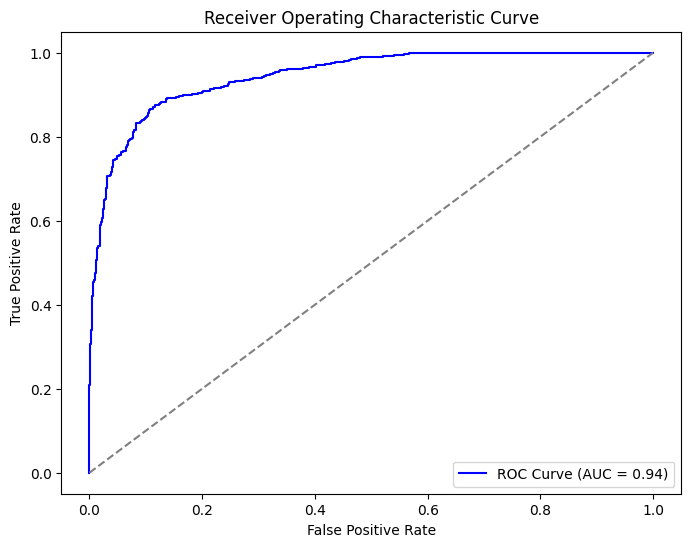

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, log_loss, matthews_corrcoef
import matplotlib.pyplot as plt

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Log Loss
log_loss_value = log_loss(y_test, y_pred_prob)
print(f'Log Loss: {log_loss_value:.2f}')

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC: {mcc:.2f}')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()


In [15]:
# Define augmentation generator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define generator for testing (without augmentation, just rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow images through the data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 5120 images belonging to 2 classes.
Found 1280 images belonging to 2 classes.


In [16]:
# Function to extract features from MobileNetV3
def extract_mobilenet_features(img_paths):
    # Use 128x128 size for MobileNetV3
    model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    model.trainable = False  # Freeze the layers of MobileNetV3
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    model_with_pooling = tf.keras.Sequential([model, global_average_layer])
    
    features = []
    for img_array in img_paths:
        img_array = preprocess_input(img_array)  # Preprocess for MobileNetV3
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        feature = model_with_pooling(img_array)
        features.append(feature.numpy().flatten())  # Flatten to 1D vector
    
    return np.array(features)

# Extract features for train and test images
train_features = extract_mobilenet_features(X_train)  # X_train images
test_features = extract_mobilenet_features(X_test)    # X_test images


In [17]:
# XGBoost model for classification
def train_xgboost(features, labels):
    dtrain = xgb.DMatrix(features, label=labels)
    
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': 5,
        'eta': 0.1,
        'verbosity': 1
    }
    
    bst = xgb.train(params, dtrain, num_boost_round=100)
    return bst

# Train XGBoost model
model = train_xgboost(train_features, y_train)


Accuracy: 0.875
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       640
           1       0.86      0.89      0.88       640

    accuracy                           0.88      1280
   macro avg       0.88      0.88      0.87      1280
weighted avg       0.88      0.88      0.87      1280



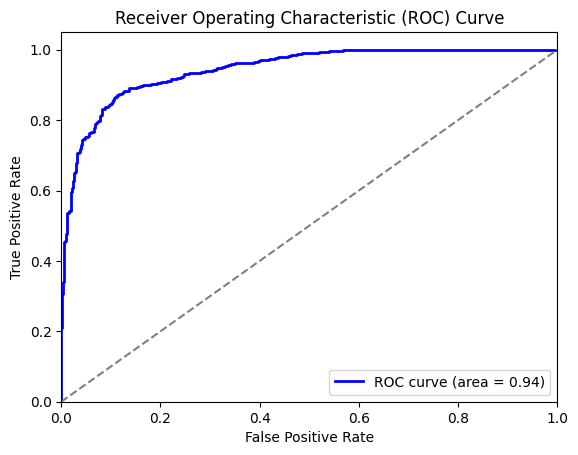

In [18]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Predict using the trained XGBoost model
y_pred_prob = model.predict(xgb.DMatrix(test_features))  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report (precision, recall, f1-score)
report = classification_report(y_test, y_pred)

# Compute ROC curve and AUROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Print all the metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
